In [2]:
!pip install -U tensorflow_datasets

     ---------------------------------------- 4.3/4.3 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 95.8/95.8 KB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 98.1/98.1 KB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 51.0/51.0 KB ? eta 0:00:00
     ---------------------------------------- 78.4/78.4 KB 4.5 MB/s eta 0:00:00
     -------------------------------------- 211.7/211.7 KB 6.5 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21503 sha256=e4a21477495d4489fed329d4215264050f3382da17810e798ff0b76616062214
  Stored in directory: c:\users\sarim amir\appdata\local\pip\cache\wheels\54\4e\28\3ed0e1c8a752867445bab994d2340724928aa3ab059c57c8db
Successfully built promise


You should consider upgrading via the 'C:\Users\Sarim Amir\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Sarim Amir\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf

In [4]:
# importing tensorflow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# importing helping libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to ~\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [7]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
# exploring data

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [10]:
# pre processing the data

def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

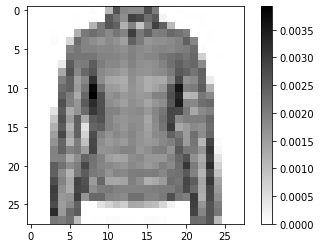

In [11]:
# exploring the processed data

# taking a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# plotting the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

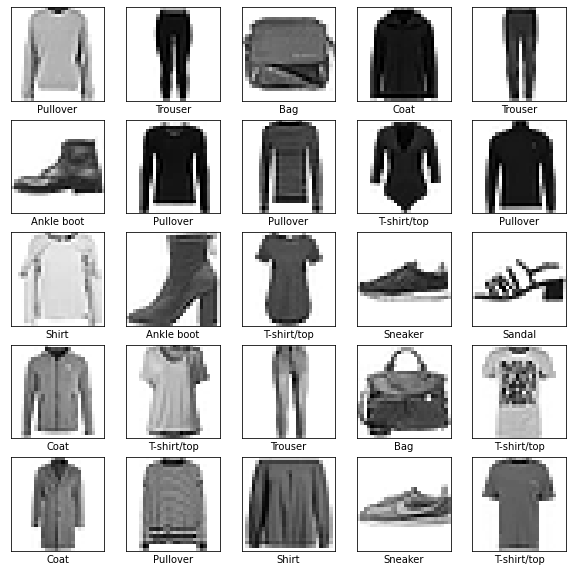

In [12]:
# plotting first 25 images from dataset along with their labels
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [13]:
# building the model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


# input: tf.keras.layers.Flatten — This layer transforms the images from a 2d-array of 28 x 28 pixels, to a 1d-array of 784 pixels (28\*28).

#hidden: tf.keras.layers.Dense — A densely connected layer of 128 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.

#output: tf.keras.layers.Dense — A 128-neuron, followed by 10-node *softmax* layer. Each node represents a class of clothing.

In [15]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

# Repeat forever by specifying dataset.repeat() (the epochs parameter described below limits how long we perform training).
# The dataset.shuffle(60000) randomizes the order so our model cannot learn anything from the order of the examples.
# And dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating the model variables.

In [17]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0738 - accuracy: 0.6651
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6284 - accuracy: 0.7721
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5601 - accuracy: 0.8016
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5195 - accuracy: 0.8171
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4908 - accuracy: 0.8273


In [19]:
# evaluate accuracy
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.5095 - accuracy: 0.8168
Accuracy on test dataset: 0.8167999982833862


In [21]:
# making predictions
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [22]:
predictions.shape

(32, 10)

In [24]:
predictions[0]

#A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:


array([8.7980996e-04, 5.0752866e-04, 1.0526066e-01, 1.2488943e-04,
       7.1376675e-01, 2.9839015e-07, 1.7557622e-01, 5.0568061e-10,
       3.8837367e-03, 7.6014594e-08], dtype=float32)

In [25]:
np.argmax(predictions[0])

# So the model is most confident that this image is  of class_names[4]. And we can check the test label to see this is correct:

4

In [26]:
test_labels[0]

4

In [28]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

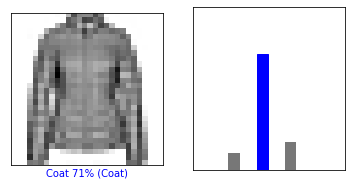

In [29]:
# lets look at the 0th image, predictions, and prediction array.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

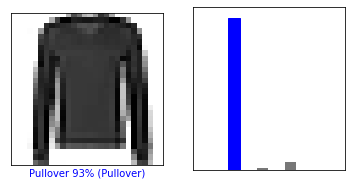

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

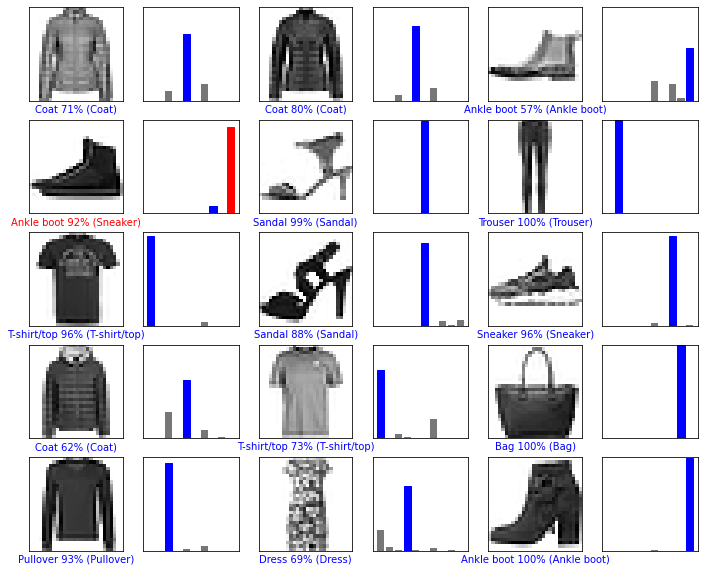

In [31]:
# Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.


# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [32]:
# Finally, use the trained model to make a prediction about a single image.

# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [33]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [35]:
# predicting the image

predictions_single = model.predict(img)

print(predictions_single)

[[8.7981042e-04 5.0752860e-04 1.0526067e-01 1.2488943e-04 7.1376669e-01
  2.9839069e-07 1.7557625e-01 5.0568150e-10 3.8837364e-03 7.6014445e-08]]


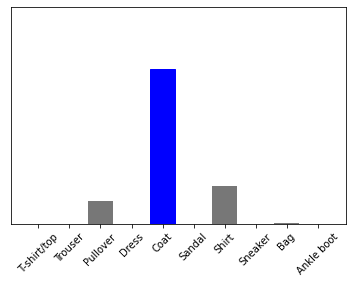

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

4